Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


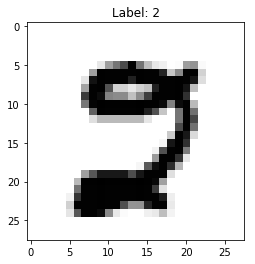

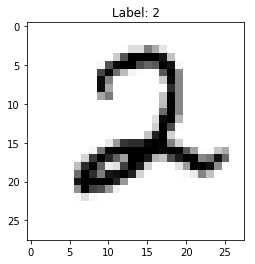

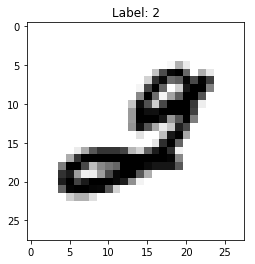

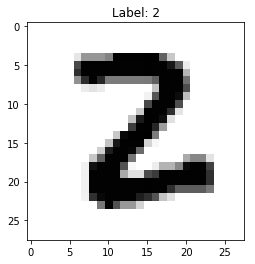

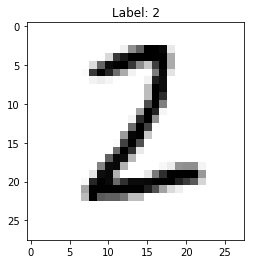

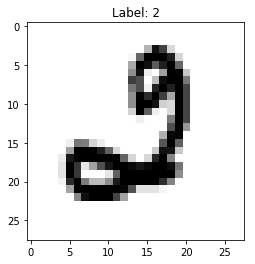

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True) # reads in the MNIST dataset

def show_pics(mnist, num = None):
    showed = set()
    for i in range(100):
        batch = mnist.train.next_batch(1)
        pic, label = batch[0], batch[1]
        if not num and np.argmax(label) not in showed:
            showed.add(np.argmax(label))
            pic = pic.reshape((28, 28))
            plt.title("Label: {}".format(np.argmax(label)))
            plt.imshow(pic, cmap = 'binary')
            plt.show()
        elif num:
            if(np.argmax(label) == num):
                pic = pic.reshape((28, 28))
                plt.title("Label: {}".format(np.argmax(label)))
                plt.imshow(pic, cmap = 'binary')
                plt.show()
            

#show_pics(mnist)
show_pics(mnist, 2)
        
        

In [4]:
# some functions for quick variable creation
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev = 0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape = shape))

# hyperparameters we will use
learning_rate = 0.1
hidden_layer_neurons = 50
num_iterations = 5000

# placeholder variables
x = tf.placeholder(tf.float32, shape = [None, 784])
y_ = tf.placeholder(tf.float32, shape = [None, 10])

In [15]:
W_1, b_1 = weight_variable([784, hidden_layer_neurons]), bias_variable([hidden_layer_neurons])
h_1 = tf.nn.relu(tf.matmul(x, W_1) + b_1)

W_2, b_2 = weight_variable([hidden_layer_neurons, 10]), bias_variable([10])
y = tf.matmul(h_1,W_2) + b_2

cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

correct_predictions = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_iterations):
        batch = mnist.train.next_batch(100)
        optimizer.run(feed_dict = {x: batch[0], y_: batch[1]})
        if i % 100 == 0:
            acc = accuracy.eval(feed_dict = {x: batch[0], y_: batch[1]})
            loss = cross_entropy_loss.eval(feed_dict = {x: batch[0], y_: batch[1]})
            print("Epoch: {}, accuracy: {}, loss: {}".format(i, acc, loss))
    acc = accuracy.eval(feed_dict = {x: mnist.test.images, y_: mnist.test.labels})
    print("testing accuracy: {}".format(acc))
        

Epoch: 0, accuracy: 0.09000000357627869, loss: 2.3363139629364014
Epoch: 100, accuracy: 0.8700000047683716, loss: 0.5591529011726379
Epoch: 200, accuracy: 0.9300000071525574, loss: 0.3211505115032196
Epoch: 300, accuracy: 0.9100000262260437, loss: 0.2837977111339569
Epoch: 400, accuracy: 0.9399999976158142, loss: 0.2627222537994385
Epoch: 500, accuracy: 0.9300000071525574, loss: 0.23817996680736542
Epoch: 600, accuracy: 0.9200000166893005, loss: 0.2973148226737976
Epoch: 700, accuracy: 0.9300000071525574, loss: 0.2122657597064972
Epoch: 800, accuracy: 0.9700000286102295, loss: 0.13291937112808228
Epoch: 900, accuracy: 0.9300000071525574, loss: 0.2724442481994629
Epoch: 1000, accuracy: 0.9200000166893005, loss: 0.2739028036594391
Epoch: 1100, accuracy: 0.9700000286102295, loss: 0.11035503447055817
Epoch: 1200, accuracy: 0.9599999785423279, loss: 0.21770790219306946
Epoch: 1300, accuracy: 0.9700000286102295, loss: 0.13546675443649292
Epoch: 1400, accuracy: 0.9599999785423279, loss: 0.167

### Exercises
1. Using different activation functions
2. Varying the number of neurons
3. Using different loss functiosn
4. Addition of another hidden layer

### More
5. Adding dropout
6. Using momentum optimization or other optimizers
7. Decaying learning rate
8. L2-regularization
